# Expectation Maximization Clustering

"The K-means approach is an example of a hard assignment clustering, where each point can belong to only one cluster. Expectation-Maximization algorithm is a way to generalize the approach to consider the soft assignment of points to clusters so that each point has a probability of belonging to each cluster."

"Maximum likelihood estimation is an approach to density estimation for a dataset by searching across probability distributions and their parameters.

It is a general and effective approach that underlies many machine learning algorithms, although it requires that the training dataset is complete, e.g. all relevant interacting random variables are present. Maximum likelihood becomes intractable if there are variables that interact with those in the dataset but were hidden or not observed, so-called latent variables.

The expectation-maximization algorithm is an approach for performing maximum likelihood estimation in the presence of latent variables. It does this by first estimating the values for the latent variables, then optimizing the model, then repeating these two steps until convergence. It is an effective and general approach and is most commonly used for density estimation with missing data, such as clustering algorithms like the Gaussian Mixture Model."

## QSAR Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [2]:
data: pd.DataFrame = pd.read_csv('../../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    
data.pop(1024) #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

K - 2


MemoryError: Unable to allocate 617. MiB for an array with shape (8992, 8992) and data type float64

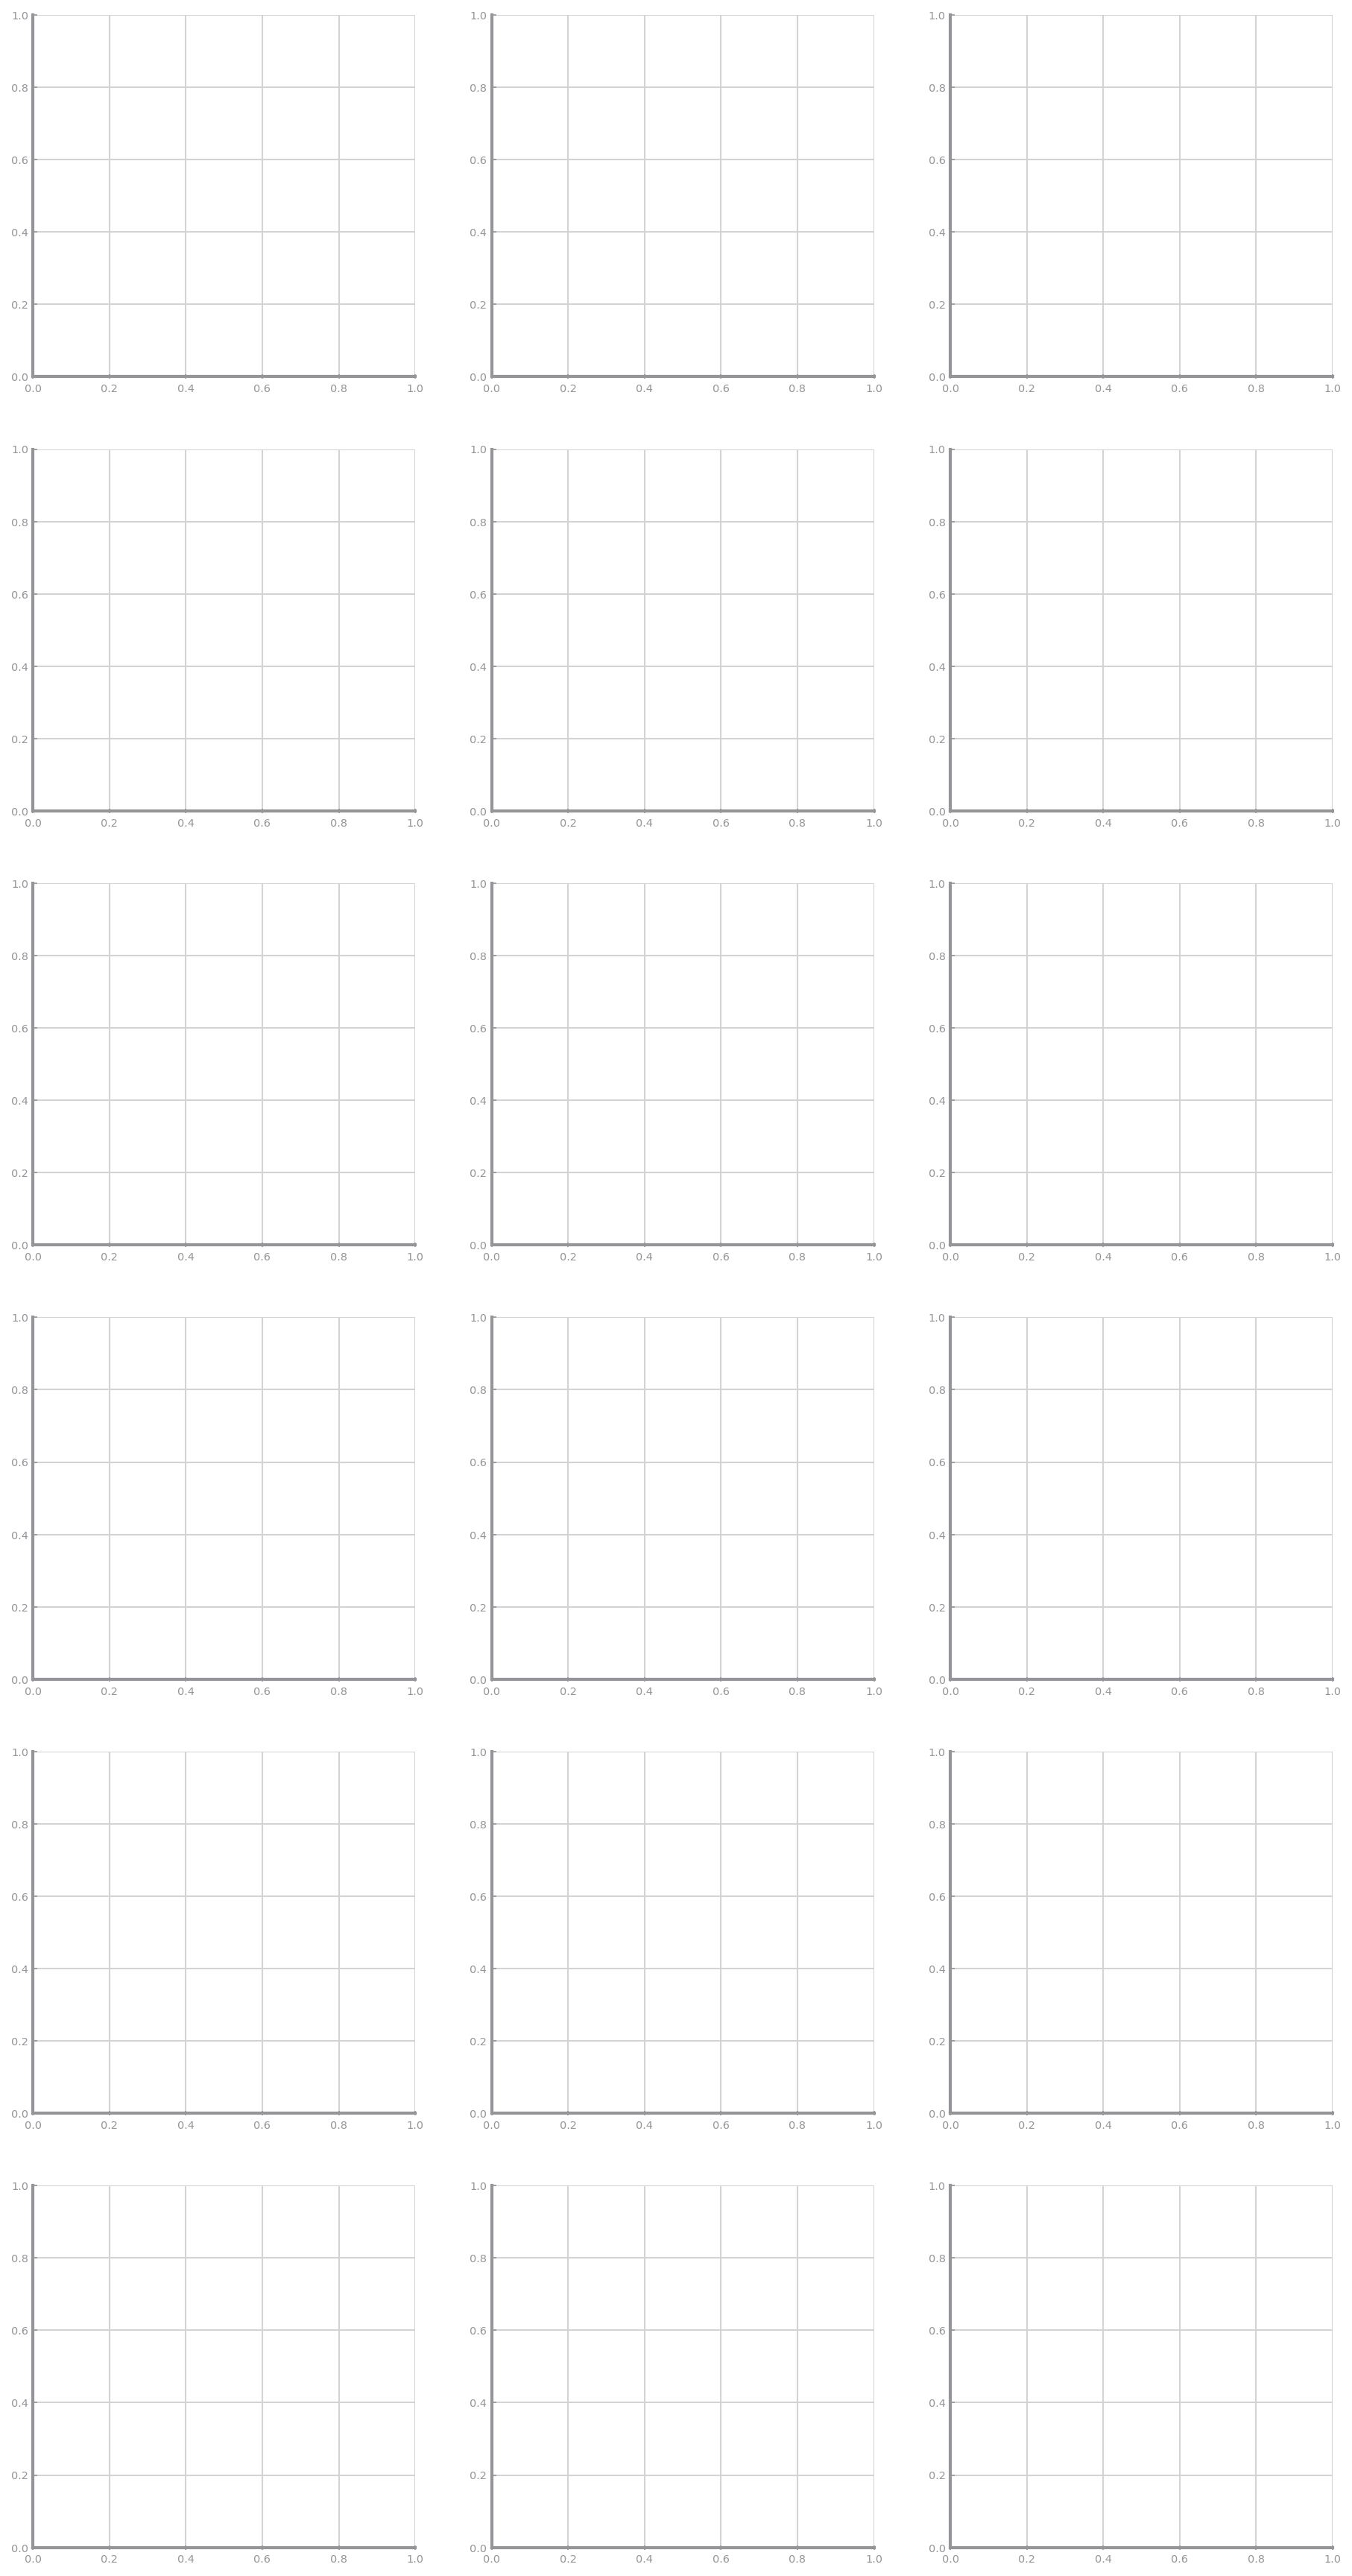

In [3]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    v1 = random.randint(0, 1023) # Random v1
    v2 = random.randint(0, 1023) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, 1023)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (16,) and (1,)

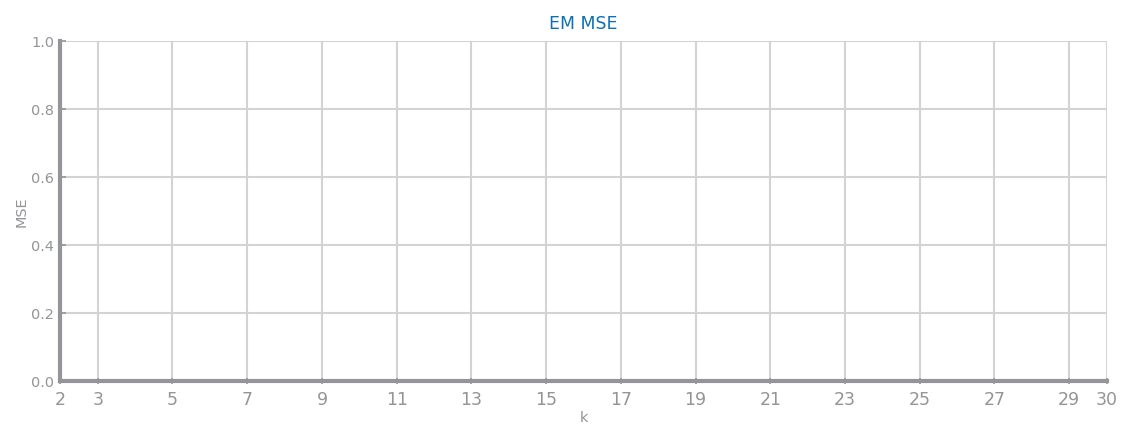

In [4]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

### So...yeah this sucks

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Chi Feature Selection

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [7]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/ORAL_chi.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 30]
rows, cols = ds.choose_grid(len(N_CLUSTERS))

K - 2
K - 3
K - 5
K - 7
K - 9
K - 11


MemoryError: Unable to allocate 617. MiB for an array with shape (8992, 8992) and data type float64

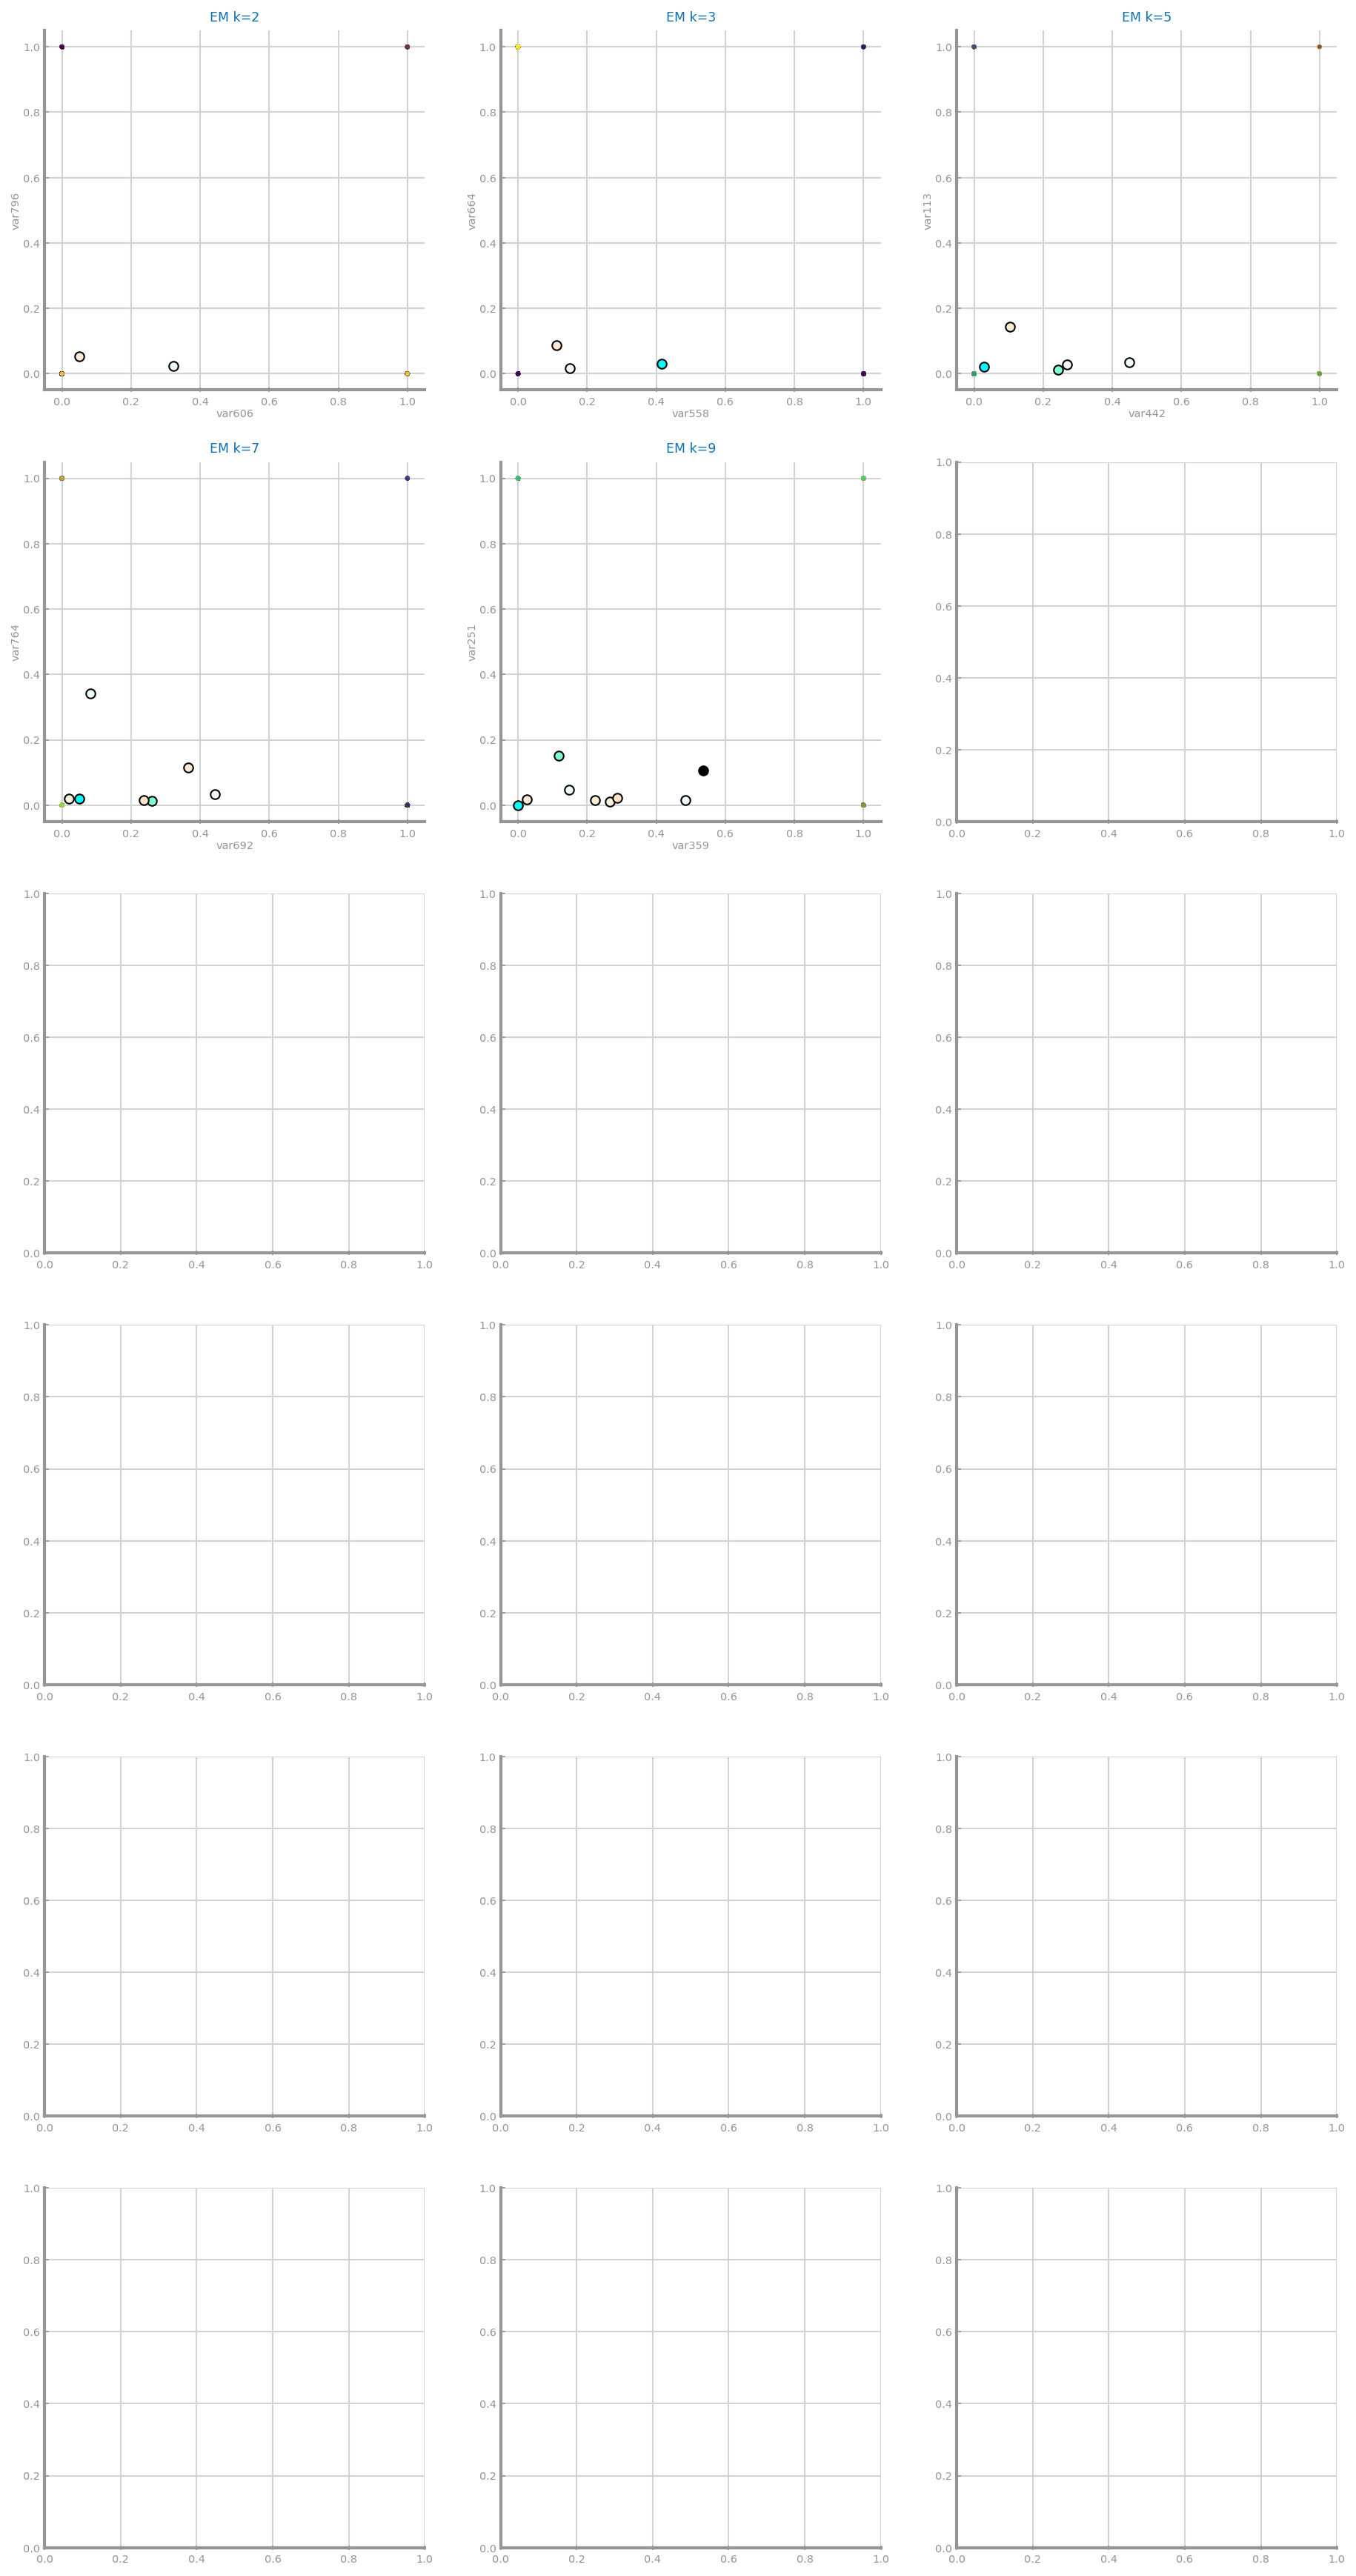

In [8]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    v1 = random.randint(0, len(data.columns)) # Random v1
    v2 = random.randint(0, len(data.columns)) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, 1023)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='EM MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()

<br/>
<br/>
<br/>
<br/>
<br/>

## QSAR Dataset - Reduced Chi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import random

In [ ]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

In [ ]:
data: pd.DataFrame = pd.read_csv('../../datasets/TO_TEST/ORAL/reduced/ORAL_S_FChi_reduced32.csv', sep=';', header=None)    
data.pop(len(data.columns)-1).values #Remove target variable

for index, row in data.iterrows():
    for col in data.columns:
        data.at[index,col] = bin_to_integer(row[col])

N_CLUSTERS = [2, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 25, 32]
rows, cols = ds.choose_grid(len(N_CLUSTERS))


data.head()

In [ ]:
mse: list = []
sc: list = []
db: list = []
    
fig, axs = plt.subplots(rows, cols, figsize=(cols*5, rows*5), squeeze=False)
i, j = 0, 0
for n in range(len(N_CLUSTERS)):
    k = N_CLUSTERS[n]
    
    print("K - " + str(k))

    estimator = GaussianMixture(n_components=k)
    estimator.fit(data)
    labels = estimator.predict(data)
    
    mse.append(ds.compute_mse(data.values, labels, estimator.means_))
    sc.append(silhouette_score(data, labels))
    db.append(davies_bouldin_score(data, labels))
    
    v1 = random.randint(0, len(data.columns)-1) # Random v1
    v2 = random.randint(0, len(data.columns)-1) # Random v2
    while(v1 == v2):
        v2 = random.randint(0, len(data.columns)-1)
    
    ds.plot_clusters(data, v2, v1, labels.astype(float), estimator.means_, k,
                     f'EM k={k}', ax=axs[i,j])
                  
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,3))
ds.plot_line(N_CLUSTERS, mse, title='KMeans MSE', xlabel='k', ylabel='MSE')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(9, 3), squeeze=False)
ds.plot_line(N_CLUSTERS, sc, title='EM SC', xlabel='k', ylabel='SC', ax=ax[0, 0], percentage=True)
ds.plot_line(N_CLUSTERS, db, title='EM DB', xlabel='k', ylabel='DB', ax=ax[0, 1], percentage=False)
plt.show()